In [135]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [134]:
prob = np.genfromtxt("hw06_predicted_probabilities.csv", delimiter = ",")
y_true = np.genfromtxt("hw06_true_labels.csv", delimiter = ",")


N=prob.shape[0] #500

In [136]:

X_sorted,y_sorted = zip(*sorted(zip(prob,y_true)))
y_sorted= np.asarray(y_sorted)
p=np.sum(y_true== 1)
n=np.sum(y_true==-1)
print(n,p)
#print(y_sorted)
#print(X_sorted)

256 244


In [137]:
def getResults(i,y_pred):
    y_pred[i]=-1
    confusion_matrix = pd.crosstab(y_pred, y_sorted.T,
                               rownames = ["y_pred"],
                               colnames = ["y_truth"])
    t=confusion_matrix[1][1]
    tp=t/p
    f=confusion_matrix.iloc[1][-1]
    fp=f/n
    prec=t/(f+t)

    return fp,tp,y_pred,prec

In [138]:
def draw_roc_curve(true_labels, predicted_probabilities):

    fp=[1]
    tp=[1] 
    y_pred= np.full(N,1)
    
    for i in range(N-1):
        f,t,y_pred,pr= getResults(i,y_pred)
        fp.append(f)
        tp.append(t)
        
    plt.figure(figsize = (6, 6))
    plt.plot(fp, tp, "-b")
    tp,fp=zip(*sorted(zip(tp,fp)))
    area=0
    for i in range(N-1):
        a=fp[i]
        b=fp[i+1]
        c=tp[i]
        d=tp[i+1]
        area+=(b-a)*(c+d)/2
    print(f"The area under the ROC curve is {area}")
    return tp,fp


The area under the ROC curve is 0.9131499743852444


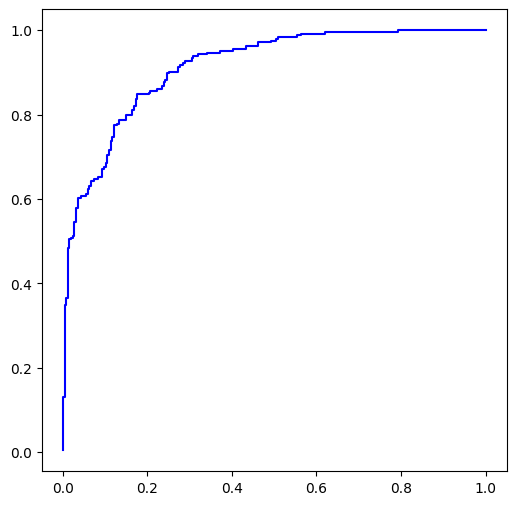

In [139]:
tp,fp=draw_roc_curve(y_true, prob)

In [140]:
def draw_pr_curve(true_labels, predicted_probabilities):
    
    tp=[1]
    prec=[p/N]
    y_pred= np.full(N,1)
    for i in range(N-1):
        f,t,y_pred,pr= getResults(i,y_pred)
        prec.append(pr)
        tp.append(t)
        
    plt.figure(figsize = (6, 6))
    plt.plot(tp, prec, "b-")
    tp,prec=zip(*sorted(zip(tp,prec)))
    area=(tp[0]*prec[0])
    for i in range(N-1):
        a=prec[i]
        b=prec[i+1]
        c=tp[i]
        d=tp[i+1]
        # print(f"{i} ---x: {(d-c)}--y: {(a+b)}---> {(d-c)*(a+b)/2} added")
        area+=(d-c)*(a+b)/2
    print(f"The area under the PR curve is {area:.3f}")
    return prec,tp

The area under the PR curve is 0.910


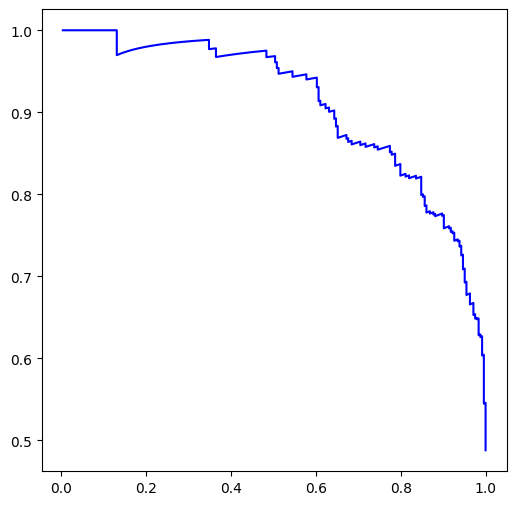

In [141]:
prec,tp=draw_pr_curve(y_true, prob)